## Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.shape , test.shape

((31647, 18), (13564, 17))

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [7]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [9]:
train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


## Univariate Analysis

In [10]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [11]:
train['subscribed'].value_counts(normalize=True)
# normalize = True prints ratio

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

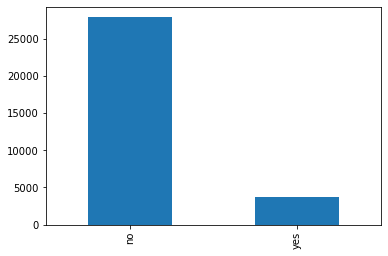

In [12]:
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

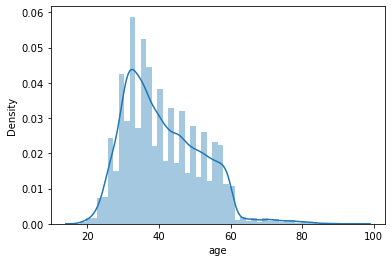

In [13]:
sn.distplot(train['age'])

<AxesSubplot:>

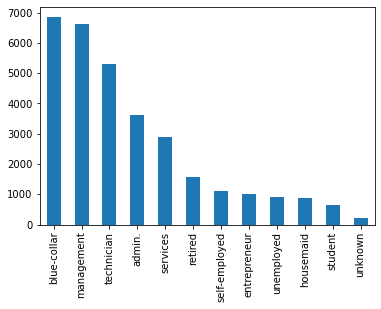

In [14]:
train['job'].value_counts().plot.bar()

<AxesSubplot:>

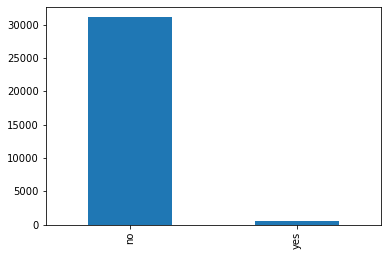

In [16]:
train['default'].value_counts().plot.bar()

<AxesSubplot:>

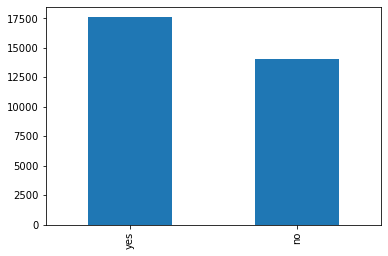

In [17]:
train['housing'].value_counts().plot.bar()

<AxesSubplot:>

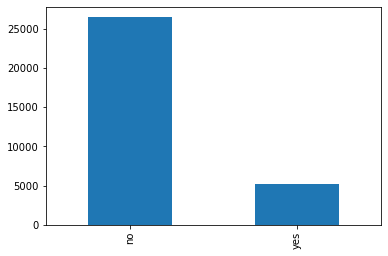

In [18]:
train['loan'].value_counts().plot.bar()

## Bivariate Analysis

In [19]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [20]:
train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,0
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,1
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,0
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,0
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,0


In [21]:
corr_matrix = train.corr()

In [23]:
corr_matrix['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.389838
ID            0.296663
pdays         0.108290
previous      0.088081
balance       0.050807
age           0.024538
day          -0.029600
campaign     -0.070607
Name: subscribed, dtype: float64

array([[<AxesSubplot:xlabel='subscribed', ylabel='subscribed'>,
        <AxesSubplot:xlabel='duration', ylabel='subscribed'>,
        <AxesSubplot:xlabel='day', ylabel='subscribed'>,
        <AxesSubplot:xlabel='campaign', ylabel='subscribed'>],
       [<AxesSubplot:xlabel='subscribed', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='day', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>],
       [<AxesSubplot:xlabel='subscribed', ylabel='day'>,
        <AxesSubplot:xlabel='duration', ylabel='day'>,
        <AxesSubplot:xlabel='day', ylabel='day'>,
        <AxesSubplot:xlabel='campaign', ylabel='day'>],
       [<AxesSubplot:xlabel='subscribed', ylabel='campaign'>,
        <AxesSubplot:xlabel='duration', ylabel='campaign'>,
        <AxesSubplot:xlabel='day', ylabel='campaign'>,
        <AxesSubplot:xlabel='campaign', ylabel='campaign'>]], dtype=object)

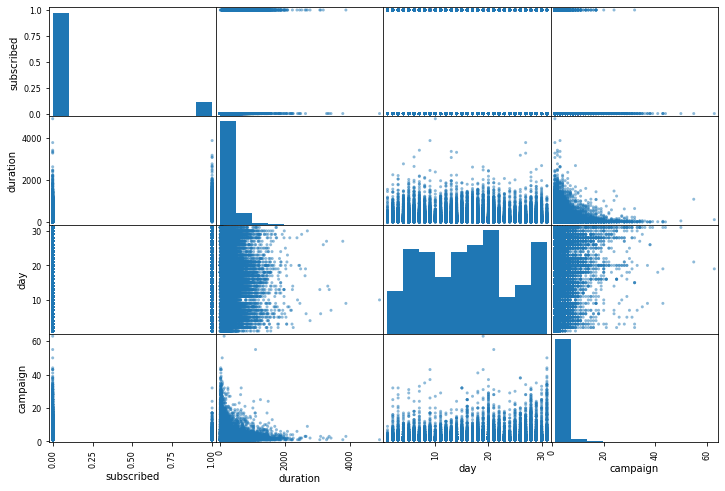

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['subscribed','duration','day','campaign']
scatter_matrix(train[attributes],figsize=(12,8))

<AxesSubplot:xlabel='duration', ylabel='subscribed'>

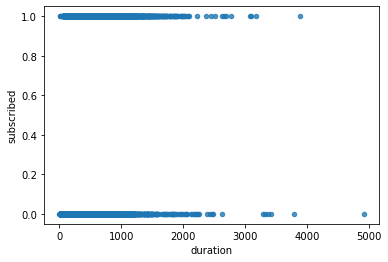

In [26]:
train.plot(kind="scatter",x='duration',y='subscribed',alpha = 0.8)

In [28]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Model Building

In [29]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [30]:
train = pd.get_dummies(train)

In [31]:
train.head(10)

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,29390,33,0,2,116,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,40444,56,1044,3,353,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,40194,50,1811,8,97,4,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,29824,45,1951,4,692,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,44676,35,1204,3,789,2,-1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [44]:
print("Rows in train set" , len(X_train))
print("Rows in target set" , len(X_val))

Rows in train set 25317
Rows in target set 6330


## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model1 = LogisticRegression()

In [62]:
model1.fit(X_train,y_train)

LogisticRegression()

In [63]:
prediction1 = model1.predict(X_val)

In [64]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_val,prediction1)

In [65]:
error

0.11200631911532385

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,prediction1)

0.8879936808846761

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model2 = DecisionTreeClassifier()

In [72]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
prediction2 = model2.predict(X_val)

In [74]:
accuracy_score(y_val,prediction2)

0.8894154818325435

In [75]:
mean_squared_error(y_val,prediction2)

0.11058451816745656

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model3 = RandomForestClassifier()

In [78]:
model3.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
prediction3 = model3.predict(X_val)

In [81]:
accuracy_score(y_val,prediction3)

0.9071090047393365

In [82]:
mean_squared_error(y_val,prediction3)

0.09289099526066351

## Test Prediction

In [83]:
test = pd.get_dummies(test)

In [84]:
test.head(10)

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,16013,32,0,22,455,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,196,33,307,5,309,2,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7,8516,37,341,3,120,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,31208,36,1381,2,149,1,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9,38462,50,181,15,119,4,372,3,1,0,...,0,0,1,0,0,0,1,0,0,0


In [85]:
test_prediction = model3.predict(test)

In [86]:
submission = pd.DataFrame()

In [87]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [88]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [89]:
submission.to_csv('submission.csv', header=True, index=False)